# stackoverflow_survey_analysis

In this jupyter notebook the analysis of the Stack Overflow survey from 2020 to 2024 is presented.   
For the analysis, the [CRISP-DM](https://en.wikipedia.org/wiki/Cross-industry_standard_process_for_data_mining) process is used.

The [CRISP-DM](https://en.wikipedia.org/wiki/Cross-industry_standard_process_for_data_mining) process consists of the following steps:    
1. Business Understanding
2. Data Understandung
3. Data Preparation
4. Data Modeling
5. Result Evaluation
6. Deployment

## 1. Business Understanding
The main objective of this analysis is to get used to the data science process according to [CRISP-DM](https://en.wikipedia.org/wiki/Cross-industry_standard_process_for_data_mining) taught during the [Udacity - Data Scientist](https://www.udacity.com/enrollment/nd025) Course and to apply the acquired knowledge to a real-world problem.

To achieve this, the analysis will use the [Stack Overflow surveys from 2020 to 2024](https://survey.stackoverflow.co/) to address the following three questions:

**When comparing the results from 2020 to 2024 ...**  

- **Question 1: ... did the difficulty of the survey increase over the past four years?**
  - *Relevance*: Understanding changes in survey difficulty over time can help to ensure that any observed trends or patterns in the results are not due to changes in survey complexity.

- **Question 2: ... does the length of the survey have and effect on its experienced difficulty?**   
  - *Relevance*: Evaluating if the length of the survey influences the perceived difficulty helps to understand if the responses are affected by survey fatigue, which could impact the reliability of the results and the quality of the data collected.

- **Question 3: ... did the past four years change job compensation?**   
  - *Relevance*: Examining changes in job compensation over the past four years helps to see trends in salary growth, inflation adjustments, and how economic factors or industry shifts may have influenced compensation practices.

## 2. Data understanding

This chapter describes the steps taken to understand the provided data by the Stack Overflow surveys from 2020 to 2024

### 2.1 Import packages and load dataframes

First, we import the relevant packages for the analysis

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Then we import the relevant surveys from 2020 to 2024 (incl. the corresponding schema) into our workspace

In [51]:
df_20 = pd.read_csv('./data/stack-overflow-developer-survey-2020/survey_results_public.csv')
df_20_schema = pd.read_csv('./data/stack-overflow-developer-survey-2020/survey_results_schema.csv')
df_21 = pd.read_csv('./data/stack-overflow-developer-survey-2021/survey_results_public.csv')
df_21_schema = pd.read_csv('./data/stack-overflow-developer-survey-2021/survey_results_schema.csv')
df_22 = pd.read_csv('./data/stack-overflow-developer-survey-2022/survey_results_public.csv')
df_22_schema = pd.read_csv('./data/stack-overflow-developer-survey-2022/survey_results_schema.csv')
df_23 = pd.read_csv('./data/stack-overflow-developer-survey-2023/survey_results_public.csv')
df_23_schema = pd.read_csv('./data/stack-overflow-developer-survey-2023/survey_results_schema.csv')
df_24 = pd.read_csv('./data/stack-overflow-developer-survey-2024/survey_results_public.csv')
df_24_schema = pd.read_csv('./data/stack-overflow-developer-survey-2024/survey_results_schema.csv')

Now, lets take a first look at the head of the 2020 to 2024 surveys

In [52]:
df_20.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [53]:
df_21.head()

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN


In [54]:
df_22.head()

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN


In [55]:
df_23.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


In [56]:
df_24.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### 2.2 Find common colums relevant for solving the questions

Lets find the coloums which are available in both datafields and which can be used to solve the three questions:    
**When comparing the results from 2020 to 2024 ...**  
- **Question 1: ... did the difficulty of the survey increase over the past four years?**
- **Question 2: ... does the length of the survey have and effect on its experienced difficulty?**     
- **Question 3: ... did the past four years change job compensation?**

In [57]:
# Find the common colums starting with the columns of the df_20 dataframe
common_columns = df_20.columns
# Intersect with the columns of the other dataframes form 2021 to 2024
common_columns = common_columns.intersection(df_21.columns)
common_columns = common_columns.intersection(df_22.columns)
common_columns = common_columns.intersection(df_23.columns)
common_columns = common_columns.intersection(df_24.columns)
# Convert to a list
common_columns_list = common_columns.tolist()
# output the list
common_columns_list 

['MainBranch',
 'Age',
 'CompTotal',
 'Country',
 'DevType',
 'EdLevel',
 'Employment',
 'NEWSOSites',
 'OrgSize',
 'SOAccount',
 'SOComm',
 'SOPartFreq',
 'SOVisitFreq',
 'SurveyEase',
 'SurveyLength',
 'YearsCode',
 'YearsCodePro']

The description of each column can be found in the schema file:

In [58]:
pd.set_option('display.max_colwidth', None) # do not limit output
loc_column = common_columns_list
for loc_column in common_columns_list:
    # Print the question text from df_20_schema
    print(f"df_20_schema: Question text for '{loc_column}'")
    print(df_20_schema[df_20_schema['Column'] == loc_column]['QuestionText'].to_string(index=False))
    # Print the question text from df_21_schema
    print(f"df_21_schema: Question text for '{loc_column}'")
    print(df_21_schema[df_21_schema['qname'] == loc_column]['question'].to_string(index=False))
    # Print the question text from df_22_schema
    print(f"df_22_schema: Question text for '{loc_column}'")
    print(df_22_schema[df_22_schema['qname'] == loc_column]['question'].to_string(index=False))
    # Print the question text from df_23_schema
    print(f"df_23_schema: Question text for '{loc_column}'")
    print(df_23_schema[df_23_schema['qname'] == loc_column]['question'].to_string(index=False))
    # Print the question text from df_24_schema
    print(f"df_24_schema: Question text for '{loc_column}'")
    print(df_24_schema[df_24_schema['qname'] == loc_column]['question'].to_string(index=False))
    print("\n" + "-"*50 + "\n")  # Separator between different columns for better readability
pd.reset_option('display.max_colwidth')

df_20_schema: Question text for 'MainBranch'
Which of the following options best describes you today? Here, by "developer" we mean "someone who writes code."
df_21_schema: Question text for 'MainBranch'
Which of the following options best describes you today? Here, by "developer" we mean "someone who writes code." <b>*</b>
df_22_schema: Question text for 'MainBranch'
Which of the following options best describes you today? Here, by "developer" we mean "someone who writes code." <b>*</b>
df_23_schema: Question text for 'MainBranch'
Which of the following options best describes you today? For the purpose of this survey, a developer is "someone who writes code". *
df_24_schema: Question text for 'MainBranch'
Which of the following options best describes you today? For the purpose of this survey, a developer is "someone who writes code".*

--------------------------------------------------

df_20_schema: Question text for 'Age'
What is your age (in years)? If you prefer not to answer, you 

Regarding the questions the following columns of both datafields seem fitting for the analysis:

In [59]:
common_columns_analysis = ['SurveyEase', 'SurveyLength', 'CompTotal']

Lets have a short look at the content of the common columns for each year

In [60]:
df_20[common_columns_analysis] # survey from 2020

,SurveyEase,SurveyLength,CompTotal
0,Neither easy nor difficult,Appropriate in length,NaN
1,NaN,NaN,NaN
2,Neither easy nor difficult,Appropriate in length,NaN
3,NaN,NaN,NaN
4,Easy,Too short,NaN
...,...,...,...
64456,NaN,NaN,NaN
64457,NaN,NaN,NaN
64458,NaN,NaN,NaN
64459,NaN,NaN,NaN


In [61]:
df_21[common_columns_analysis] # survey from 2021

,SurveyEase,SurveyLength,CompTotal
0,Easy,Appropriate in length,4800.0
1,Easy,Appropriate in length,NaN
2,Easy,Appropriate in length,NaN
3,Neither easy nor difficult,Appropriate in length,NaN
4,Easy,Appropriate in length,NaN
...,...,...,...
83434,Easy,Appropriate in length,160500.0
83435,Easy,Appropriate in length,200000.0
83436,Neither easy nor difficult,Appropriate in length,1800.0
83437,Neither easy nor difficult,Appropriate in length,90000.0


In [62]:
df_22[common_columns_analysis] # survey from 2022

,SurveyEase,SurveyLength,CompTotal
0,NaN,NaN,NaN
1,Difficult,Too long,NaN
2,Neither easy nor difficult,Appropriate in length,32000.0
3,Easy,Appropriate in length,60000.0
4,Easy,Too long,NaN
...,...,...,...
73263,Easy,Too long,60000.0
73264,Easy,Too long,107000.0
73265,Easy,Appropriate in length,NaN
73266,Easy,Appropriate in length,58500.0


In [63]:
df_23[common_columns_analysis] # survey from 2023

,SurveyEase,SurveyLength,CompTotal
0,NaN,NaN,NaN
1,Easy,Appropriate in length,2.850000e+05
2,Easy,Appropriate in length,2.500000e+05
3,Easy,Appropriate in length,1.560000e+05
4,Neither easy nor difficult,Appropriate in length,1.320000e+06
...,...,...,...
89179,Neither easy nor difficult,Too long,2.000000e+05
89180,Easy,Too long,NaN
89181,Neither easy nor difficult,Too long,NaN
89182,Neither easy nor difficult,Appropriate in length,NaN


In [64]:
df_24[common_columns_analysis]  # survey from 2024

,SurveyEase,SurveyLength,CompTotal
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,Easy,Appropriate in length,NaN
3,Easy,Too long,NaN
4,Easy,Too short,NaN
...,...,...,...
65432,NaN,NaN,NaN
65433,NaN,NaN,NaN
65434,NaN,NaN,NaN
65435,NaN,NaN,NaN


Since there seem to be a lot of NaN's, let's count them down for the selected colums.

In [65]:
# counting the NaN's for each df (from 2020 to 2024)
df_20_nan_count_per_row_perc = (df_20[common_columns_analysis].isna().sum() / df_20[common_columns_analysis].shape[0])*100
df_21_nan_count_per_row_perc = (df_21[common_columns_analysis].isna().sum() / df_21[common_columns_analysis].shape[0])*100
df_22_nan_count_per_row_perc = (df_22[common_columns_analysis].isna().sum() / df_22[common_columns_analysis].shape[0])*100
df_23_nan_count_per_row_perc = (df_23[common_columns_analysis].isna().sum() / df_23[common_columns_analysis].shape[0])*100
df_24_nan_count_per_row_perc = (df_24[common_columns_analysis].isna().sum() / df_24[common_columns_analysis].shape[0])*100
print(f"2020 survey: NaN values in %:\n{df_20_nan_count_per_row_perc.round(1)}\n") # print 2020's Percentage of NaN's
print(f"2021 survey: NaN values in %:\n{df_21_nan_count_per_row_perc.round(1)}\n") # print 2020's Percentage of NaN's
print(f"2022 survey: NaN values in %:\n{df_22_nan_count_per_row_perc.round(1)}\n") # print 2020's Percentage of NaN's
print(f"2023 survey: NaN values in %:\n{df_23_nan_count_per_row_perc.round(1)}\n") # print 2020's Percentage of NaN's
print(f"2024 survey: NaN values in %:\n{df_24_nan_count_per_row_perc.round(1)}\n") # print 2024's Percentage of NaN's

2020 survey: NaN values in %:
SurveyEase      19.6
SurveyLength    19.8
CompTotal       46.0
dtype: float64

2021 survey: NaN values in %:
SurveyEase       1.8
SurveyLength     2.1
CompTotal       43.5
dtype: float64

2022 survey: NaN values in %:
SurveyEase       3.8
SurveyLength     3.9
CompTotal       47.6
dtype: float64

2023 survey: NaN values in %:
SurveyEase       2.9
SurveyLength     3.0
CompTotal       45.9
dtype: float64

2024 survey: NaN values in %:
SurveyEase      14.1
SurveyLength    14.1
CompTotal       48.4
dtype: float64



Furthermore, the possibilites to answer were different in 2020 to 2024.
- This can be seen in the addtach *.pdf files which desribe each survey.    
    - e.g. for the column 'CompTotal'. In 2020, 2021, 2022 and 2023 it was possible to enter the values weekly, monthly OR yearly (defined in column ["CompFreq"]). In 2024 this was only yearly.

In [66]:
pd.set_option('display.max_colwidth', None) # do not limit output
# Get unique values for each column
df_20_unique_values = df_20[common_columns_analysis].apply(lambda x: set(x.unique()))
df_21_unique_values = df_21[common_columns_analysis].apply(lambda x: set(x.unique()))
df_22_unique_values = df_22[common_columns_analysis].apply(lambda x: set(x.unique()))
df_23_unique_values = df_23[common_columns_analysis].apply(lambda x: set(x.unique()))
df_24_unique_values = df_24[common_columns_analysis].apply(lambda x: set(x.unique()))
# Display the result
print(f"unique values of 2020 survey: '{df_20_unique_values}'")
print("-------------------------------")
print(f"unique values of 2021 survey: '{df_21_unique_values}'")
print("-------------------------------")
print(f"unique values of 2022 survey: '{df_22_unique_values}'")
print("-------------------------------")
print(f"unique values of 2023 survey: '{df_23_unique_values}'")
print("-------------------------------")
print(f"unique values of 2024 survey: '{df_24_unique_values}'")
pd.reset_option('display.max_colwidth')

unique values of 2020 survey: 'SurveyEase                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       {nan, Difficult, Easy, Neither easy nor difficult}
SurveyLength                                                                                                                                                                         

### 2.3 Summary of Findings during Data understanding

During the Data Understanding step, the following points stood out:

- There are over 64.000 respondents within each dataset (2020: 64.461, 2021: 83.439, 2022: 73.268, 2023: 89.184, 2024: 65.437)
- The columns `['SurveyEase', 'SurveyLength','CompTotal']` seem promising to solve the questions listed in 1. Business Understanding
- There are a lot of NaN values within the survey
- The columns `['SurveyEase', 'SurveyLength']` contain `categorical values`, where as `['CompTotal']` contains `numerical values`
- In the 2020 survey the column 'CompTotal' could be answered either weekly, monthly or yearly. In 2024 it was only yearly.
- Some values in 'CompTotal' seem extremly low / high (e.g. 0.0 ,1.0, ... 370000000.0, ...)

This means: before working with the data, we need to prepare the data for the analysis

## 3. Data preparation

This chapter describes the step taken to prepare the data for analysis.

### 3.1 Data preparation for Question 1 and Question 2

To start the analysis, the first two questions were: ...
- When comparing the results from 2020 to 2024 did the difficulty of the survey increase over the past four years?
- When comparing the results from 2020 to 2024 does the length of the survey have and effect on its experienced difficulty?

First, lets count how much and what usable data is available:

In [67]:
# calculate usable data for the columns SurveyEase and SurveyLength by counting NaN values and substract
# them from the total number of available columns for each year:
print(f"2020 survey:")
print(f"SurveyEase - unique values: {(df_20['SurveyEase'].unique())}")
print(f"SurveyEase - Not NaN values: {(df_20['SurveyEase'].shape[0] - df_20['SurveyEase'].isna().sum()).round(1)}")
print(f"(SurveyEase - this results in usable data in %: {(100-df_20_nan_count_per_row_perc["SurveyEase"]).round(1)})")
print(f"SurveyLength - unique values: {(df_20['SurveyLength'].unique())}")
print(f"SurveyLength - Not NaN values: {(df_20['SurveyLength'].shape[0] - df_20['SurveyLength'].isna().sum()).round(1)}")
print(f"(SurveyLength - this results in usable data in %: {(100-df_20_nan_count_per_row_perc["SurveyLength"]).round(1)})")
print("\n ------------------------------ \n")
print(f"2021 survey:")
print(f"SurveyEase - unique values: {(df_21['SurveyEase'].unique())}")
print(f"SurveyEase - Not NaN values: {(df_21['SurveyEase'].shape[0] - df_21['SurveyEase'].isna().sum()).round(1)}")
print(f"(SurveyEase - this results in usable data in %: {(100-df_21_nan_count_per_row_perc["SurveyEase"]).round(1)})")
print(f"SurveyLength - unique values: {(df_21['SurveyLength'].unique())}")
print(f"SurveyLength - Not NaN values: {(df_21['SurveyLength'].shape[0] - df_21['SurveyLength'].isna().sum()).round(1)}")
print(f"(SurveyLength - this results in usable data in %: {(100-df_21_nan_count_per_row_perc["SurveyLength"]).round(1)})")
print("\n ------------------------------ \n")
print(f"2022 survey:")
print(f"SurveyEase - unique values: {(df_22['SurveyEase'].unique())}")
print(f"SurveyEase - Not NaN values: {(df_22['SurveyEase'].shape[0] - df_22['SurveyEase'].isna().sum()).round(1)}")
print(f"(SurveyEase - this results in usable data in %: {(100-df_22_nan_count_per_row_perc["SurveyEase"]).round(1)})")
print(f"SurveyLength - unique values: {(df_22['SurveyLength'].unique())}")
print(f"SurveyLength - Not NaN values: {(df_22['SurveyLength'].shape[0] - df_22['SurveyLength'].isna().sum()).round(1)}")
print(f"(SurveyLength - this results in usable data in %: {(100-df_22_nan_count_per_row_perc["SurveyLength"]).round(1)})")
print("\n ------------------------------ \n")
print(f"2023 survey:")
print(f"SurveyEase - unique values: {(df_23['SurveyEase'].unique())}")
print(f"SurveyEase - Not NaN values: {(df_23['SurveyEase'].shape[0] - df_23['SurveyEase'].isna().sum()).round(1)}")
print(f"(SurveyEase - this results in usable data in %: {(100-df_23_nan_count_per_row_perc["SurveyEase"]).round(1)})")
print(f"SurveyLength - unique values: {(df_23['SurveyLength'].unique())}")
print(f"SurveyLength - Not NaN values: {(df_23['SurveyLength'].shape[0] - df_23['SurveyLength'].isna().sum()).round(1)}")
print(f"(SurveyLength - this results in usable data in %: {(100-df_23_nan_count_per_row_perc["SurveyLength"]).round(1)})")
print("\n ------------------------------ \n")
print(f"2024 survey:")
print(f"SurveyEase - unique values: {(df_24['SurveyEase'].unique())}")
print(f"SurveyEase - Not NaN values: {(df_24['SurveyEase'].shape[0] - df_24['SurveyEase'].isna().sum()).round(1)}")
print(f"(SurveyEase - this results in usable data in %: {(100-df_24_nan_count_per_row_perc["SurveyEase"]).round(1)})")
print(f"SurveyLength - unique values: {(df_24['SurveyLength'].unique())}")
print(f"SurveyLength - Not NaN values: {(df_24['SurveyLength'].shape[0] - df_24['SurveyLength'].isna().sum()).round(1)}")
print(f"(SurveyLength - this results in usable data in %: {(100-df_24_nan_count_per_row_perc["SurveyLength"]).round(1)})")

2020 survey:
SurveyEase - unique values: ['Neither easy nor difficult' nan 'Easy' 'Difficult']
SurveyEase - Not NaN values: 51802
(SurveyEase - this results in usable data in %: 80.4)
SurveyLength - unique values: ['Appropriate in length' nan 'Too short' 'Too long']
SurveyLength - Not NaN values: 51701
(SurveyLength - this results in usable data in %: 80.2)

 ------------------------------ 

2021 survey:
SurveyEase - unique values: ['Easy' 'Neither easy nor difficult' nan 'Difficult']
SurveyEase - Not NaN values: 81948
(SurveyEase - this results in usable data in %: 98.2)
SurveyLength - unique values: ['Appropriate in length' 'Too long' nan 'Too short']
SurveyLength - Not NaN values: 81711
(SurveyLength - this results in usable data in %: 97.9)

 ------------------------------ 

2022 survey:
SurveyEase - unique values: [nan 'Difficult' 'Neither easy nor difficult' 'Easy']
SurveyEase - Not NaN values: 70508
(SurveyEase - this results in usable data in %: 96.2)
SurveyLength - unique valu

The responses for SurveyEase consist each year of [nan, 'Easy', 'Neither easy nor difficult', 'Difficult'] and for SurveyLength of [nan 'Appropriate in length' 'Too long' 'Too short'], which is helpful for the analysis, because only the same answers were allowed each year. However, there are some missing / NaN values.

There are different methods to handle missing values, each with its advantages and disadvantages:

- Removing missing values
- Imputing missing values

Removing missing values is straightforward and avoids introducing bias, but it can lead to information loss and potential bias if the missing data isn't random. Imputing missing values retains the dataset's size and variability but may introduce bias, adds complexity, and can potentially lead to model overfitting.

To address the first two questions, the "Removing missing values" option was chosen because, even after removal, there is still sufficient data available. Additionally, to ensure an unaltered analysis, I wanted to directly compare the responses from the four years (excluding NaN values), as they align well due to the identical response options.

Lets create the datafields to answer Question 1 and 2:

In [68]:
# only copy columns 'SurveyEase', 'SurveyLength' and drop NaN's in 'SurveyEase' and 'SurveyLength'
df_20_q1q2_cleaned = df_20[['SurveyEase', 'SurveyLength']].dropna(subset=['SurveyEase', 'SurveyLength'])
df_21_q1q2_cleaned = df_21[['SurveyEase', 'SurveyLength']].dropna(subset=['SurveyEase', 'SurveyLength'])
df_22_q1q2_cleaned = df_22[['SurveyEase', 'SurveyLength']].dropna(subset=['SurveyEase', 'SurveyLength'])
df_23_q1q2_cleaned = df_23[['SurveyEase', 'SurveyLength']].dropna(subset=['SurveyEase', 'SurveyLength'])
df_24_q1q2_cleaned = df_24[['SurveyEase', 'SurveyLength']].dropna(subset=['SurveyEase', 'SurveyLength'])
if (
    df_20_q1q2_cleaned.isna().sum().any() or 
    df_21_q1q2_cleaned.isna().sum().any() or 
    df_22_q1q2_cleaned.isna().sum().any() or
    df_23_q1q2_cleaned.isna().sum().any() or
    df_24_q1q2_cleaned.isna().sum().any()):
    print("still some NaN's left") # check for NaN's! (should be 0!)
else:
    print("all NaN's removed") # all good

all NaN's removed


For the planned analysis the categorical variables are kept and not changed into a dummie variable.

For question two, all dataframes can be combined to use all information from the years 2020 - 2024.

In [69]:
# Combining datafields to one datafield for the years 2020-2024.
df_combined_q1q2_cleaned = pd.concat([df_20_q1q2_cleaned, df_21_q1q2_cleaned, df_22_q1q2_cleaned, df_23_q1q2_cleaned, df_24_q1q2_cleaned], axis=0)

# Reset the index
df_combined_q1q2_cleaned.reset_index(drop=True, inplace=True)

df_combined_q1q2_cleaned

,SurveyEase,SurveyLength
0,Neither easy nor difficult,Appropriate in length
1,Neither easy nor difficult,Appropriate in length
2,Easy,Too short
3,Neither easy nor difficult,Appropriate in length
4,Easy,Appropriate in length
...,...,...
345167,Neither easy nor difficult,Appropriate in length
345168,Easy,Appropriate in length
345169,Neither easy nor difficult,Appropriate in length
345170,Neither easy nor difficult,Appropriate in length


### 3.2 Data preparation for Question 3

adding yearly compensation to all datafields.    
49 weeks of work per year are used to include holidays.

In [70]:
df_20["YearlyCompensation"] = np.where(df_20["CompFreq"] == "weekly", df_20["CompTotal"] * 49,
                              np.where(df_20["CompFreq"] == "monthly", df_20["CompTotal"] * 12,
                              df_20["CompTotal"]))
df_21["YearlyCompensation"] = np.where(df_21["CompFreq"] == "weekly", df_21["CompTotal"] * 49,
                              np.where(df_21["CompFreq"] == "monthly", df_21["CompTotal"] * 12,
                              df_21["CompTotal"]))
df_22["YearlyCompensation"] = np.where(df_22["CompFreq"] == "weekly", df_22["CompTotal"] * 49,
                              np.where(df_22["CompFreq"] == "monthly", df_22["CompTotal"] * 12,
                              df_22["CompTotal"]))
df_23["YearlyCompensation"] = df_23["CompTotal"] # already only annual values available
df_24["YearlyCompensation"] = df_24["CompTotal"] # already only annual values available

## 4. Data modeling

## 5. Evaluation

### 5.1 Evaluate - Question 1

To answer the first question   
**When comparing the results from 2020 to 2024 did the difficulty of the survey increase over the past four years?**   
the prepared data from the surveys of 2020 to 2024 is taken into account and the percentage for each answer/category is calculated.

<Figure size 1000x600 with 0 Axes>

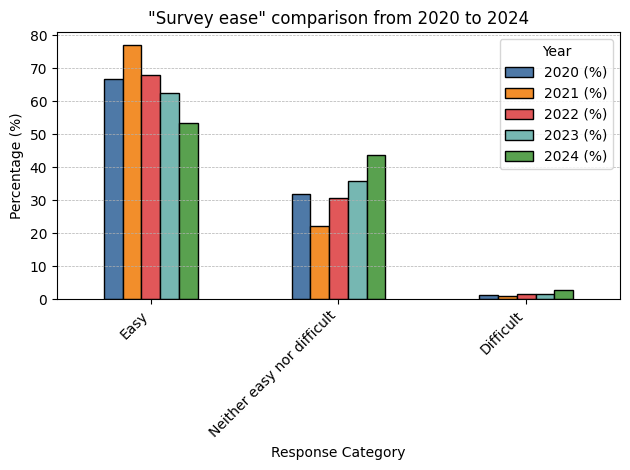

,2020 (%),2021 (%),2022 (%),2023 (%),2024 (%)
SurveyEase,,,,,
Easy,66.90,77.08,67.97,62.52,53.50
Neither easy nor difficult,31.76,22.02,30.63,35.90,43.68
Difficult,1.35,0.91,1.40,1.58,2.82


In [71]:
# Calculate percentage for each category in survey difficulty from 2020 to 2024
df_20_q1_percentage = (df_20_q1q2_cleaned['SurveyEase'].value_counts(normalize=True) * 100).round(2)
df_21_q1_percentage = (df_21_q1q2_cleaned['SurveyEase'].value_counts(normalize=True) * 100).round(2)
df_22_q1_percentage = (df_22_q1q2_cleaned['SurveyEase'].value_counts(normalize=True) * 100).round(2)
df_23_q1_percentage = (df_23_q1q2_cleaned['SurveyEase'].value_counts(normalize=True) * 100).round(2)
df_24_q1_percentage = (df_24_q1q2_cleaned['SurveyEase'].value_counts(normalize=True) * 100).round(2)

# Creating new DataFrame to compare the percentages from 2020 to 2024
q1_comparison_df = pd.DataFrame({
    '2020 (%)': df_20_q1_percentage,
    '2021 (%)': df_21_q1_percentage,
    '2022 (%)': df_22_q1_percentage,
    '2023 (%)': df_23_q1_percentage,
    '2024 (%)': df_24_q1_percentage
})

# Plotting the comparison
plt.figure(figsize=(10, 6))
q1_comparison_df.plot(kind='bar', color=['#4E79A7', '#F28E2B', '#E15759', '#76B7B2', '#59A14F'], edgecolor='black')
plt.title('"Survey ease" comparison from 2020 to 2024')
plt.xlabel('Response Category')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, axis='y')
plt.tight_layout()
plt.show()

# Display the comparison DataFrame
q1_comparison_df

Explanation

### 5.2 Evaluate - Question 2

To answer the second question   
**When comparing the results from 2020 to 2024 does the length of the survey have and effect on its experienced difficulty?**

In [72]:
contingency_table = pd.crosstab(df_combined_q1q2_cleaned['SurveyEase'], df_combined_q1q2_cleaned['SurveyLength'])
contingency_table_percent = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100
print(contingency_table)
print(contingency_table_percent.round(2))

SurveyLength                Appropriate in length  Too long  Too short
SurveyEase                                                            
Difficult                                    1343      3802        207
Easy                                       184109     35247       9318
Neither easy nor difficult                  75871     33774       1501
SurveyLength                Appropriate in length  Too long  Too short
SurveyEase                                                            
Difficult                                   25.09     71.04       3.87
Easy                                        80.51     15.41       4.07
Neither easy nor difficult                  68.26     30.39       1.35


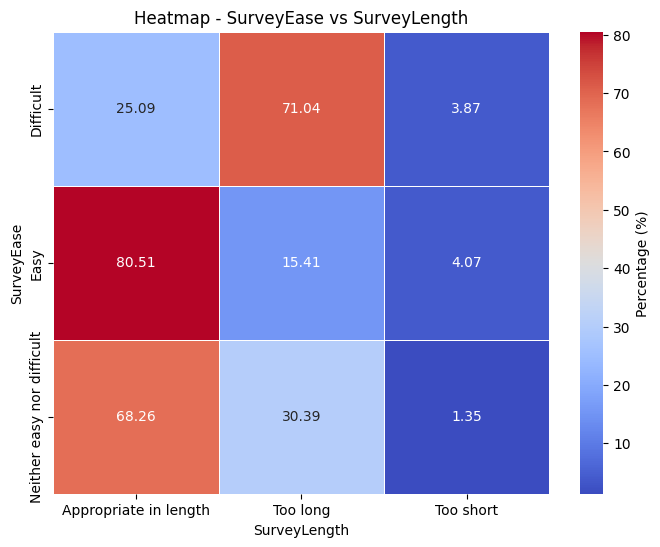

In [73]:
# import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table_percent, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5, cbar_kws={'label': 'Percentage (%)'})
plt.title('Heatmap - SurveyEase vs SurveyLength')
plt.xlabel('SurveyLength')
plt.ylabel('SurveyEase')
plt.show()